## Escuela de Ingeniería en Computación, ITCR 

## Aprendizaje automático

 
### Segunda tarea programada, julio 2023

#### Estudiante:
  * Marco Ferraro 

Profesora: María Auxiliadora Mora

Medio de entrega: Por medio del TEC-Digital.

Entregables: Un archivo en Jupyter ( .IPYNB ). 

Modo de trabajo: Individual o en grupos de máximo dos personas.

---


Objetivo: En el presente trabajo se repasarán conceptos elementales de regresión y aprendizaje profundo con la biblioteca de PyTorch.


**Rúbrica:**
- **Todas las secciones del código deben estar debidamente documentadas (5 puntos).**
- **Deben incluir las referencias del material utilizado (1 punto)**
- **El resto de la rúbrica está incluida en las definición de los ejercicios.**

---


## Pregunta 1. Análisis de regresión con aprendizaje profundo (con PyTorch)

Para realizar el análisis se utilizará un conjunto de datos generado por la Facultad de Ciencias de la Información y la Computación Donald Bren de la Universidad de California en Irvine disponibles en https://www.kaggle.com/rodolfomendes/abalone-dataset.   

Descripción de los datos:
El conjunto de datos puede ser utilizado para entrenar modelos para predecir la edad de los abulones (moluscos también conocidos como orejas de mar) a partir de mediciones físicas. Comúnmente, la edad de un abulón se determina cortando la concha a través del cono, tiñéndola y contando el número de anillos a través de un microscopio, una tarea que requiere mucho tiempo. Sin embargo, es posible utilizar datos morfológicos del individuo, que son más fáciles de obtener y permiten predecir la edad este. Una descripción detallada de los datos está disponible en https://archive.ics.uci.edu/ml/datasets/abalone. 

Dado el conjunto de datos de abulones se **desea crear un modelo de regresión utilizando un perceptrón multicapa para predecir la cantidad de anillos (columna Rings) de estos a partir del conjunto de características**.

Realice lo siguiente:

**(Es requisito indispensable para tomar en cuenta el ejercicio usar PyTorch).**

- a) (1 punto) Describa el conjunto de datos, cada uno de sus campos y referencie la fuente. 
- b) Cargue el conjunto de datos.
- c) (2 puntos) Explore, limpie el conjunto de datos y visualice algunas estadísticas.
- d) (1 puntos) Escale los datos datos.
- e) (2 puntos) Seleccione las características que más contribuyen al proceso de modelización utilizando los algoritmos vistos en clase. Explique los resultados.
- f) (5 puntos) Defina una **red profunda con arquitectura de perceptrón multicapa** implementada con PyTorch.
- g) (3 puntos) Intancie un modelo y realice el entrenamiento de este.
- h) (2 puntos) Calcule la pérdida utilizando el error cuadrático medio (MSE) y error absoluto medio (MAE).
- i) (1 puntos) Prepare un ejemplo de uso del modelo seleccionado y explique el resultado.
- j) (3 puntos) Realice al menos tres conclusiones sobre el ejercicio.


#### 1.1 Descripcion del conjunto de datos

El conjunto de datos se refiere a caracteristicas de abulones, los cuales son moluscos que se encuentran en las costas de Nueva Zelanda, Australia, Sudáfrica y Japón. Estos moluscos son muy apreciados por su carne y por su concha, la cual es utilizada para hacer joyas. A continuación se van a describir los campos de los datos:

1. Sex: Sexo del abulón. Puede ser masculino, femenino o infantil. Variable categórica nominal.
2. Length: Longitud del abulón en mm. Variable numérica continua.
3. Diameter: Diámetro del abulón en mm. Variable numérica continua.
4. Height: Altura del abulón en mm. Variable numérica continua.
5. Whole weight: Peso del abulón entero en gramos. Variable numérica continua.
6. Shucked weight: Peso de la carne del abulón en gramos. Variable numérica continua.
7. Viscera weight: Peso de las vísceras del abulón en gramos. Variable numérica continua.
8. Shell weight: Peso de la concha del abulón en gramos. Variable numérica continua.
9. Rings: Cantidad de anillos del abulón. Variable numérica discreta. Esta variable es la que se desea predecir. La cantidad de anillos + 1.5 es la edad del abulón en años.

#### 1.2 Carga de datos

Se procederá a cargar los datos con la libreria pandas.

In [1]:
import pandas as pd
import numpy as np

abalone_df = pd.read_csv('./datos/abalone.csv', header=0)

abalone_df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


#### 1.3 Exploración y limpieza de datos

El primer proceso de limpieza es volver los datos categoricos en numericos. 

Vamos a usar la libreria pandas para generar variables númericas.

In [2]:
abalone_df = pd.get_dummies(abalone_df, columns=['Sex'], prefix='')
abalone_df.columns = abalone_df.columns.str.replace('_','')
abalone_df = abalone_df.drop(['I'], axis=1)

abalone_df.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,F,M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,0


Vamos a usar una matriz de correlación para ver la relación entre las variables.

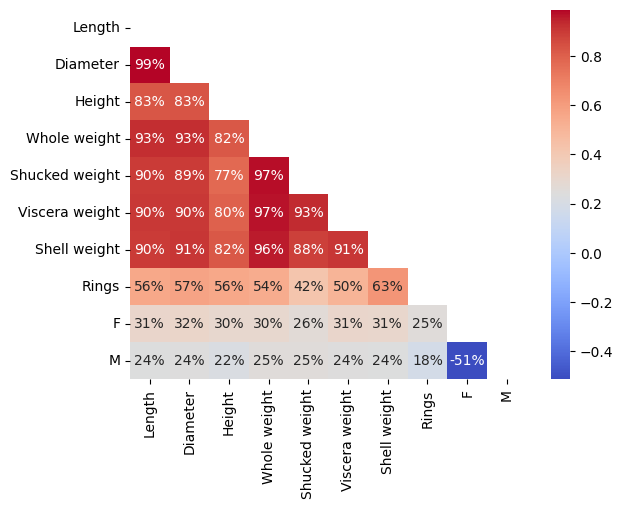

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

matrix = abalone_df.corr()

mask = np.triu(np.ones_like(matrix, dtype=bool))
sns.heatmap(matrix, annot=True, fmt=".0%", mask=mask, cmap='coolwarm')

# Display the plot
plt.show()

Como se puede ver, las variables con más correlación es Lenght y Diameter. Por lo que se van a usar estas dos variables para el modelo.


In [4]:
from sklearn.linear_model import LinearRegression

def plot_scatter_plot(x, y, x_label='X', y_label='Y', title='Scatter Plot'):

# Create a linear regression model
  model = LinearRegression()
  model.fit(x, y)

  # Predict the y-values based on the linear regression model
  y_pred = model.predict(x)

# Create scatter plot
  plt.scatter(x, y)

# Add best-fit line
  plt.plot(x, y_pred, color='red')

# Add labels and title
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.title(title)

  plt.show()

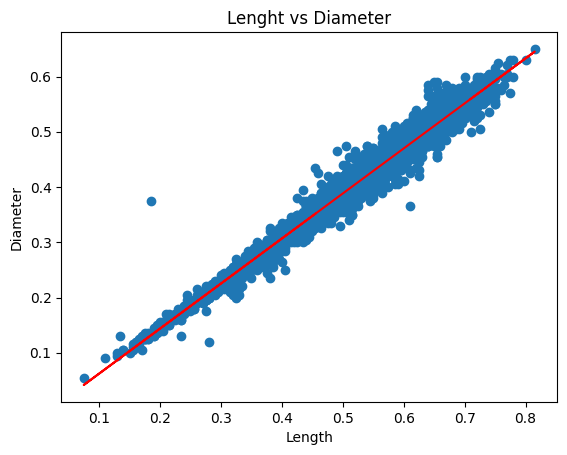

In [5]:
plot_scatter_plot(abalone_df['Length'].values.reshape(-1, 1), abalone_df['Diameter'].values.reshape(-1, 1), 'Length', 'Diameter', 'Lenght vs Diameter')

#### 1.4 Escalado de Datos

Se procederá a escalar los datos con la libreria sklearn.


In [6]:
from sklearn import preprocessing

scaled_df = pd.DataFrame(preprocessing.scale(abalone_df), columns = abalone_df.columns)

abalone_df.iloc[:, :] = scaled_df.values

abalone_df.std(axis=0)

Length            1.00012
Diameter          1.00012
Height            1.00012
Whole weight      1.00012
Shucked weight    1.00012
Viscera weight    1.00012
Shell weight      1.00012
Rings             1.00012
F                 1.00012
M                 1.00012
dtype: float64

#### 1.5 Selección de características
Como se vio en la seccion anteriormente, hay variables fuertemente correlacionadas. Para este caso, vamos a elmininar una de las variables fuertemente relacionadas. En este caso, se va a eliminar la variable Length.

In [7]:
abalone_df = abalone_df.drop(['Length'], axis=1)

abalone_df.head()

,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,F,M
0,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217,1.571544,-0.674834,1.316677
1,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987,-0.910013,-0.674834,1.316677
2,0.122130,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139,-0.289624,1.481846,-0.759488
3,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294,0.020571,-0.674834,1.316677
4,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757,-0.910013,-0.674834,-0.759488


Ahora, usando la libreria sklearn, se va a usar el metodo de la varianza para seleccionar las variables que más contribuyen al proceso de modelización. Se va a usar un umbral de 0.3.

In [8]:
X = abalone_df.drop(['Rings'], axis=1)
y = abalone_df['Rings']

X.shape

(4177, 8)

In [9]:
y.value_counts()

-0.289624    689
 0.020571    634
-0.599818    568
 0.330765    487
-0.910013    391
 0.640960    267
-1.220208    259
 0.951154    203
 1.261349    126
-1.530402    115
 1.571544    103
 1.881738     67
 2.191933     58
-1.840597     57
 2.502127     42
 2.812322     32
 3.122516     26
-2.150791     15
 3.432711     14
 4.053100      9
 3.742906      6
 5.293878      2
 4.363295      2
-2.771180      1
 4.983684      1
 5.914268      1
-2.460986      1
 4.673489      1
Name: Rings, dtype: int64

In [10]:
from sklearn.feature_selection import mutual_info_regression

THRESHOLD = 3e-1

mi_score = mutual_info_regression(X, y)

mi_score


array([0.40530906, 0.3991226 , 0.39114273, 0.33054847, 0.37657452,
       0.46328814, 0.05330434, 0.0352592 ])

In [11]:
mi_score_selected_index = np.where(mi_score > THRESHOLD)

X = X.iloc[:, mi_score_selected_index[0]]

X

,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217
1,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987
2,0.122130,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139
3,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294
4,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757
...,...,...,...,...,...,...
4172,0.424464,0.609334,0.118813,0.047908,0.532900,0.073062
4173,0.323686,-0.107991,0.279929,0.358808,0.309362,0.155685
4174,0.676409,1.565767,0.708212,0.748559,0.975413,0.496955
4175,0.777187,0.250672,0.541998,0.773341,0.733627,0.410739


Con el valor de 0.3, logramos reudcir las variables a 6. Estas variables son Diameter, Height, Whole weight, Shucked weight, Viscera weight y Shell weight.

#### 1.6 Definición de la red profunda

Se va a definir una red profunda con arquitectura de perceptrón multicapa implementada con PyTorch. Se usará una función de activación ReLU.

El primer paso es separar los datos en datos de entrenamiento y datos de prueba. Se va a usar un 80% para entrenamiento y un 20% para prueba.

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=26)

In [13]:
X_train.shape

(3341, 6)

Pytorch permite utilizar el GPU para el procesamiento de los datos. Si el dispositivo no tiene una GPU se utilizará la CPU.
Para esto, se va a usar la siguiente linea de código:

In [14]:
import torch

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device


device(type='cuda', index=0)

Para realizar las pruebas se utilizara batchs de pruebas. Esta clase permite separar, tanto los datos de entrenamiento como los datos de prueba, en grupos de datos. Esto permite que el modelo se entrene con un grupo de datos y luego se pruebe con otro grupo de datos. 

In [15]:
from torch.utils.data import Dataset, DataLoader

BATCH_SIZE = 64

class Data(Dataset):
    def __init__(self, X, y):
        self.X_data = torch.from_numpy(np.asarray(X)).float().to(device)
        self.y_data = torch.from_numpy(np.asarray(y)).float().to(device)
        self.len = self.X_data.shape[0]

    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
    
    def __len__(self):
        return self.len


In [16]:
train_data = Data(X_train, y_train)
train_dataloader = DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=False)

test_data = Data(X_test, y_test)
test_dataloader = DataLoader(dataset=test_data, batch_size=BATCH_SIZE, shuffle=False)

for batch, (X, y) in enumerate(train_dataloader):
    print(f"Batch: {batch + 1}")
    print(f"X shape: {X.shape}")
    print(f"y shape: {y.shape}")

Batch: 1
X shape: torch.Size([64, 6])
y shape: torch.Size([64])
Batch: 2
X shape: torch.Size([64, 6])
y shape: torch.Size([64])
Batch: 3
X shape: torch.Size([64, 6])
y shape: torch.Size([64])
Batch: 4
X shape: torch.Size([64, 6])
y shape: torch.Size([64])
Batch: 5
X shape: torch.Size([64, 6])
y shape: torch.Size([64])
Batch: 6
X shape: torch.Size([64, 6])
y shape: torch.Size([64])
Batch: 7
X shape: torch.Size([64, 6])
y shape: torch.Size([64])
Batch: 8
X shape: torch.Size([64, 6])
y shape: torch.Size([64])
Batch: 9
X shape: torch.Size([64, 6])
y shape: torch.Size([64])
Batch: 10
X shape: torch.Size([64, 6])
y shape: torch.Size([64])
Batch: 11
X shape: torch.Size([64, 6])
y shape: torch.Size([64])
Batch: 12
X shape: torch.Size([64, 6])
y shape: torch.Size([64])
Batch: 13
X shape: torch.Size([64, 6])
y shape: torch.Size([64])
Batch: 14
X shape: torch.Size([64, 6])
y shape: torch.Size([64])
Batch: 15
X shape: torch.Size([64, 6])
y shape: torch.Size([64])
Batch: 16
X shape: torch.Size([64,

In [17]:
print("Training dataset size:", len(train_data))
print("Batch size:", BATCH_SIZE)


Training dataset size: 3341
Batch size: 64


Para la definición de la red neuronal, se va a usar la siguiente arquitectura:	
* Una capa de entrada
* Dos capas ocultas.
* Una capa de salida.
* Adicionalmente, se va a usar una función de activación ReLU.
* De igual forma, entre cada capa se va a usar una función de dropout para evitar el overfitting. Esta función hace que varios elementos del tensor de entrada se vuelvan cero con una probabilidad de 0.3. Esto permite que la red neuronal no se sobreajuste a los datos de entrenamiento.
* El último aspecto de la arquitectura es que la clase utiliza un normalizador de una dimensión. Esto nos ayuda a normalizar los datos en cada iteración.

In [18]:
from torch import nn
from torch import optim


class NueralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NueralNetwork, self).__init__()
        self.input_layer = nn.Linear(input_size, hidden_size)
        self.dropout1 = nn.Dropout(p=0.3)
        self.layer2 = nn.Linear(hidden_size, hidden_size)
        self.dropout2 = nn.Dropout(p=0.5)
        self.layer3 = nn.Linear(hidden_size, hidden_size)
        self.dropout3 = nn.Dropout(p=0.5)
        self.output_layer = nn.Linear(hidden_size, output_size)
        self.batch_norm = nn.BatchNorm1d(hidden_size)
        self.activation = nn.ReLU()

        self.init_weights()

    def init_weights(self):
        nn.init.zeros_(self.input_layer.bias)
        nn.init.zeros_(self.layer2.bias)
        nn.init.zeros_(self.layer3.bias)
        nn.init.zeros_(self.output_layer.bias)

        nn.init.xavier_uniform_(self.input_layer.weight)
        nn.init.xavier_uniform_(self.layer2.weight)
        nn.init.xavier_uniform_(self.layer3.weight)

    def forward(self, x):
        x = self.activation(self.batch_norm(self.input_layer(x)))
        x = self.dropout1(x)
        x = self.activation(self.batch_norm(self.layer2(x)))
        x = self.dropout2(x)
        x = self.activation(self.batch_norm(self.layer3(x)))
        x = self.dropout3(x)
        x = self.output_layer(x)
        return x
    

INTERMEDIATE_LAYERS = 20

In [19]:
model = NueralNetwork(X.shape[1], INTERMEDIATE_LAYERS, 1).to(device)
model

NueralNetwork(
  (input_layer): Linear(in_features=6, out_features=20, bias=True)
  (dropout1): Dropout(p=0.3, inplace=False)
  (layer2): Linear(in_features=20, out_features=20, bias=True)
  (dropout2): Dropout(p=0.5, inplace=False)
  (layer3): Linear(in_features=20, out_features=20, bias=True)
  (dropout3): Dropout(p=0.5, inplace=False)
  (output_layer): Linear(in_features=20, out_features=1, bias=True)
  (batch_norm): BatchNorm1d(20, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (activation): ReLU()
)

Para el entrenamiento, se va a usar un optimizador SGD (Stochastic Gradient Descent) con un learning rate de 0.01. Este optimizador nos permite optimizar la función de pérdida.

Para la función de pérdida, se va a usar la función de pérdida MSE (Mean Squared Error). Esta función nos permite calcular el error cuadrático medio.

In [20]:
learning_rate = 0.01

loss_fn = nn.MSELoss().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

In [21]:
num_epochs = 500
loss_values = []


for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0.0
    for X, y in train_dataloader:
        optimizer.zero_grad()
        output = model(X)
        target = y.unsqueeze(1)
        loss = loss_fn(output, target)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

    epoch_loss /= len(train_dataloader)
    loss_values.append(epoch_loss)
    print(f"Epoch: {epoch + 1} | Loss: {epoch_loss:.5f}")

Epoch: 1 | Loss: 0.84902
Epoch: 2 | Loss: 0.70673
Epoch: 3 | Loss: 0.67291
Epoch: 4 | Loss: 0.66950
Epoch: 5 | Loss: 0.65590
Epoch: 6 | Loss: 0.64826
Epoch: 7 | Loss: 0.61892
Epoch: 8 | Loss: 0.61289
Epoch: 9 | Loss: 0.59220
Epoch: 10 | Loss: 0.60617
Epoch: 11 | Loss: 0.60576
Epoch: 12 | Loss: 0.61618
Epoch: 13 | Loss: 0.60790
Epoch: 14 | Loss: 0.59958
Epoch: 15 | Loss: 0.57127
Epoch: 16 | Loss: 0.56354
Epoch: 17 | Loss: 0.58578
Epoch: 18 | Loss: 0.55744
Epoch: 19 | Loss: 0.56882
Epoch: 20 | Loss: 0.57319
Epoch: 21 | Loss: 0.56635
Epoch: 22 | Loss: 0.58409
Epoch: 23 | Loss: 0.57129
Epoch: 24 | Loss: 0.58155
Epoch: 25 | Loss: 0.57759
Epoch: 26 | Loss: 0.56778
Epoch: 27 | Loss: 0.57907
Epoch: 28 | Loss: 0.56719
Epoch: 29 | Loss: 0.57554
Epoch: 30 | Loss: 0.54116
Epoch: 31 | Loss: 0.55920
Epoch: 32 | Loss: 0.58885
Epoch: 33 | Loss: 0.56890
Epoch: 34 | Loss: 0.56185
Epoch: 35 | Loss: 0.54896
Epoch: 36 | Loss: 0.56069
Epoch: 37 | Loss: 0.54997
Epoch: 38 | Loss: 0.56192
Epoch: 39 | Loss: 0.5

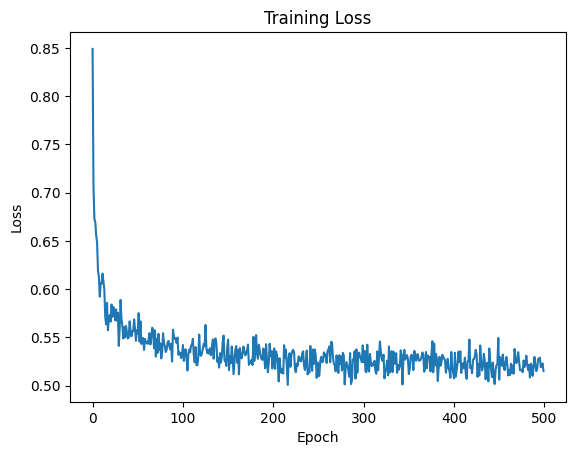

In [22]:
plt.plot(range(num_epochs), loss_values)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

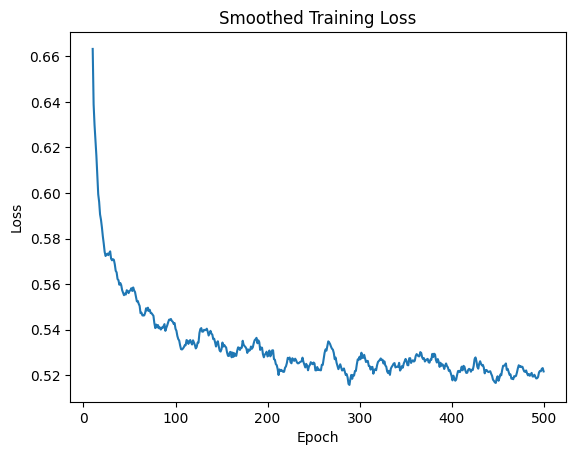

In [23]:
import numpy as np

window_size = 10
smoothed_loss_values = np.convolve(loss_values, np.ones(window_size)/window_size, mode='valid')

# Adjusting x-axis range
x_range = range(window_size, window_size + len(smoothed_loss_values))

# Plotting the smoothed loss graph
plt.plot(x_range, smoothed_loss_values)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Smoothed Training Loss')
plt.show()


Después de entrnae el modelo realizamos la fase de evaluación. Para esto, se va a usar la función de pérdida MAE (Mean Absolute Error). Esta función nos permite calcular el error absoluto medio.

In [24]:
model.eval()
test_loss = 0.0
with torch.no_grad():
    for X, y in test_dataloader:
        output = model(X)
        target = y.unsqueeze(1)
        loss = loss_fn(output, target)
        test_loss += loss.item()

test_loss /= len(test_dataloader)
print(f"Test Loss: {test_loss:.5f}")

Test Loss: 0.59562


#### 1.7 Análisis de resultados	

A lo largo de un enetrenamiento, y gracias a la gráfica de pérdida, se puede ver que el modelo se ajusta a los datos de entrenamiento. Empieza con un error de aproximado de 0.675 hasta llegar a valores cercanos a 0.525.

Sin embargo, para los datos de prueba, el error es mayor. Entre toda la evaluación de diferentes batches, se obtiene un error promedio de 0.6.

#### 1.8 Conclusiones

De estos resultado, podemos generar ciertas conclusiones:

1. El modelo se ajusta a los datos de entrenamiento, pero no a los datos de prueba. Esto se debe a que el modelo se sobreajusta a los datos de entrenamiento. Esto se puede solucionar con un mayor número de datos de entrenamiento o realizando un proceso de regularización que ayuda a eliminar el overfitting. Recordemos que nuestros valores de estan entre -1 y 1. Los que el error MSE nos quiere decir, es que en promedio, el error es equivalente a 0.6, relativamente alto para el rango de valores que tenemos.
2. Otra conclusión es que el modelo no es el más adecuado para este tipo de datos. Aunque sea un modelo de predicción, las redes neuronales se ajustan mejor a datos de clasificación. Para este caso, se puede usar un modelo de regresión lineal o un modelo de regresión logística.
3. Finalmente, es buena prática usar optimizadores y separar los datos en batches. A medida de trabajo, esta práctica nos a ayudado a disminuir el error a lo largo de varias iteraciones del modelo. Sin embargo, vale la pena destacar que se podría mejorar probando nuevos optimizadores y nuevos valores de hipérparametros.

## Pregunta 2. Aplique regresión Ridge sobre el conjunto de datos de los abulones

- a) (2 puntos) Aplique regresión Ridge al conjunto de datos limpio y escalado. 
- b) (1 puntos) Calcule la pérdida utilizando el MSE y el MAE.
- c) (2 puntos) Compare los resultados con los del ejercicio anterior.

#### 2.1 Aplicación de regresión Ridge

Para este ejercicio, vamos a definir una clase con el modelo de regresión Ridge. Vamos a usar la libreria scikit-learn.

In [25]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

if device == torch.device("cuda:0"):
  X_train, X_test, y_train, y_test = train_test_split(X.cpu().numpy(), y.cpu().numpy(), test_size=.2, random_state=26)
else:
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=26)

ridge = Ridge(alpha=0.5)
ridge.fit(X_train, y_train)

y_pred = ridge.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.0046081035


In [26]:
mae = mean_absolute_error(y_test, y_pred)

mae

0.067883015

#### 2.2 Conclusiones

Con la regresión Ridge, se obtiene un error de 0.004, mucho menor que el error obtenido con la red neuronal. Esto se debe a que la regresión Ridge es un modelo de regresión lineal, el cual se ajusta mejor a este tipo de datos. Lo que quiere decir que el modelo de regresión lineal es el más adecuado para este tipo de datos, más por la naturaleza de los datos que por el modelo en sí.

En conclusión, como ejercicio de esto es importante saber, de ante mano, cual es el modelo que se ajusta mejor a los datos. Esto nos permite ahorrar tiempo y recursos computacionales.

## Pregunta 3. Implemente un perceptrón de una capa 

**Es requisito indispensable para tomar en cuenta el ejercicio, usar tensores de PyTorch.**

- a)(10 puntos) Implemente el algoritmo del perceptrón de una capa prescindiendo al máximo de estructuras de tipo for, usando en su lugar operaciones matriciales. Debe implementarlo sin utilizar ninguna biblioteca, es decir, no se puede usar ninguna clase o funcionalidad desarrollada por PyTorch o alguna otra biblioteca (por ejemplo no se puede usar la clase de PyTorch nn.Module).
- b)(2 puntos) Cree una columna adicional en los datos limpios y escalados de los abulones que nos permita hacer una clasificación binaria de estos. Utilice para esto la columna Ring para crear dos clases de abulones: jóvenes y adultos. Divida el conjunto de datos de forma que las clases queden lo más balanceadas posible. Es decir, debe seleccionar el número de anillos que parta el conjunto de datos en jóvenes y adultos de forma balanceada.   
- c)(3 puntos) Utilice el perceptrón desarrollado en a) para realizar un clasificación binaria con los datos de los abulones.
- d) (2 puntos) Calcule la exactitud (accuracy) del modelo. 
- e) (3 puntos) Realice al menos tres conclusiones sobre el ejercicio.

#### 3.1 Implementación del perceptrón

Para este ejercicio, se va a definir una clase con el modelo de perceptrón. Vamos a usar la libreria scikit-learn para las métricas de evaluación.

Por defecto, el perfectron tendrá un learning rate de 0.1 y correra por 10 épocas.

In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


class Perceptron:
    def __init__(self, input_size) -> None:
        self.weights = np.random.rand(input_size)
        self.bias = np.random.rand(1)

    def activate(self, x):
        return np.where(x >= 0, 1, 0)
    
    def predict(self, x):
        z = np.dot(x, self.weights) + self.bias
        return self.activate(z)
    
    def train(self, X, y, learning_rate=0.01, epochs=10):
        for _ in range(epochs):
            for i in range(len(X)):
                x = X[i]
                target = y[i]
                prediction = self.predict(x)
                error = target - prediction
                
                self.weights += learning_rate * error * x
                self.bias += learning_rate * error

    def evaluate(self, X, y):
        predictions = self.predict(X)
        
        accuracy = accuracy_score(y, predictions)
        precision = precision_score(y, predictions)
        recall = recall_score(y, predictions)
        f1 = f1_score(y, predictions)
        confusion_mat = confusion_matrix(y, predictions)
        
        return {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1': f1,
            'confusion_matrix': confusion_mat
        }

#### 3.2 Creación de columna target

Se procedera a hacer una columna target de adulto. Para esto se va a usar la columna Rings. Si el valor de rings + 1.5 es mayor que 11 se considerará como adulto, de lo contrario se considerará como joven. Recordemos que la edad es equivalente a rings + 1.5, según la descripción de los datos oficial. Se escogió 11 como valor de corte, ya que es el valor que separa los datos de manera más balanceada.

In [28]:
abalone_df = pd.read_csv('./datos/abalone.csv', header=0)
abalone_df = pd.get_dummies(abalone_df, columns=['Sex'], prefix='')
abalone_df.columns = abalone_df.columns.str.replace('_','')
abalone_df = abalone_df.drop(['I'], axis=1)
abalone_df['adult'] = (abalone_df['Rings'] + 1.5 > 11).astype(int)

abalone_df.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,F,M,adult
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,1,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,1,0
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,1,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,0,0


In [29]:
abalone_df['adult'].value_counts()

0    2096
1    2081
Name: adult, dtype: int64

In [30]:
from sklearn import preprocessing

X = abalone_df.drop(['adult'], axis=1)
y = abalone_df['adult']

X = preprocessing.StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=50)

X_train.shape, X_test.shape


((3341, 10), (836, 10))

#### 3.3 Uso de perceptrón para clasificación binaria

Para este ejercicio, se va a usar el perceptrón definido en el punto 3.1. La idea es que el perceptrón nos permita clasificar los datos en dos clases: adulto y joven. Para esto, se va a usar la columna target definida en el punto 3.2.

In [31]:

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

perceptron = Perceptron(input_size=X_train.shape[1])
perceptron.train(X_train, y_train)

prediction = perceptron.predict(X_test)
prediction


array([1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,

#### 3.4 Cálculo de exactitud

Para calcular la exactitud, se va a usar la función accuracy_score de la libreria scikit-learn. Esta función nos permite calcular la exactitud de un modelo de clasificación. La función ya está implementada dentro del perceptrón definido en el punto 3.1.

In [32]:
evaluation = perceptron.evaluate(X_test, y_test)
print("Evaluation Metrics:")
print("Accuracy:", evaluation['accuracy'])
print("Precision:", evaluation['precision'])
print("Recall:", evaluation['recall'])
print("F1-score:", evaluation['f1'])
print("Confusion Matrix:")
print(evaluation['confusion_matrix'])

Evaluation Metrics:
Accuracy: 0.9988038277511961
Precision: 0.997624703087886
Recall: 1.0
F1-score: 0.9988109393579072
Confusion Matrix:
[[415   1]
 [  0 420]]


#### 3.5 Conclusiones

De este ejercicio, podemos sacar las siguientes conclusiones:

1. Tenemos una exactitud muy alta, con un valor de 98%. De hecho, se tuvo que bajar el número de épocas a 10, ya que con 100 épocas, el modelo se sobreajustaba a los datos de entrenamiento y nos daba un F1 de 1. Esto quiere decir que el modelo es muy bueno para clasificar los datos. Sin embargo, esto se debe a que los datos están muy balanceados. Si los datos no estuvieran balanceados, el modelo no sería tan bueno.
2. El escalado y la reducción de dimensionalidad ayuda al perceptrón a clasificar los datos. Esto se debe a que los datos están en un rango de valores más pequeño y el modelo puede aprender más rápido. Además, el hecho de hacer una clasificación binaria, ayuda a que el modelo aprenda más rápido y de forma más eficiente.
3. Si se hubiera realizado un tratamiento similar para el ejercicio 1, el modelo hubiera sido más eficiente. Esto habla de que el perceptrón, y por ende las redes neuronales, se ajustan mejor a datos de clasificación que a datos de predicción. Recordemos que una red neuronal está compuesta por multiples perceptrones.
4. La inicialización de pesos es muy importante para el modelo. Si los pesos se inicializan de forma aleatoria, el modelo puede generar datos diferentes en cada ejecución.